In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12,4)

#CB_color_cycle = ['#8ecae6', '#1D5D9B', '#023047',
#                  '#ffb703', '#fb8500', '#6F61C0']
CB_color_cycle = ['#0073BD', '#F6EDD9', '#71AB48', '#D0DCAA',  
                  '#fb9a99', '#e31a1c',
                  '#fdbf6f', '#ff7f00',
                  '#cab2d6', '#6a3d9a', '#b15928', '#D2987B',
                  '#FFE8D2', '#BCA79D', '#005B46', '#C4FCF0', '#4C8077', '#9DB09C']
sns.set_palette(sns.color_palette(CB_color_cycle, 11))

In [14]:
combined = pd.read_excel("combined_extend.xlsx" , sheet_name=None)
sheets = list(combined.keys())
combined_summary = pd.DataFrame()
for name in sheets:
    combined[name]['unique60_ratio'] = combined[name]['unique60_pri']/combined[name]['all_primary']
for name in sheets:
    df2 = pd.DataFrame([[combined[name]['repeated_mismatch'].sum()/combined[name].shape[0]*100, 
                         combined[name]['repeated_indel'].sum()/combined[name].shape[0]*100, 
                         combined[name]['coverage_jump'].sum()/combined[name].shape[0]*100, 
                         combined[name]['normal'].sum()/combined[name].shape[0]*100]], index=[name])
    combined_summary = pd.concat([combined_summary ,df2])
combined_summary = combined_summary.reset_index()
combined_summary.columns = ['Species', 'repeated_mismatch', 'repeated_indel', 'coverage_jump', 'Normal']

combined_summary

,Species,repeated_mismatch,repeated_indel,coverage_jump,Normal
0,Greenland_wolf,50.602410,43.373494,26.907631,48.995984
1,Red_deer,20.175439,0.877193,0.000000,78.947368
2,Philippine_flying_lemur,65.986395,57.823129,34.013605,29.251701
3,Asiatic_elephant,1.666667,2.083333,0.000000,97.916667
4,Tammar_wallaby,10.416667,0.000000,0.000000,89.583333
5,Gray_short_tailed_opossum,0.000000,0.000000,2.222222,97.777778
6,Clouded_leopard,10.625000,2.500000,2.500000,89.375000


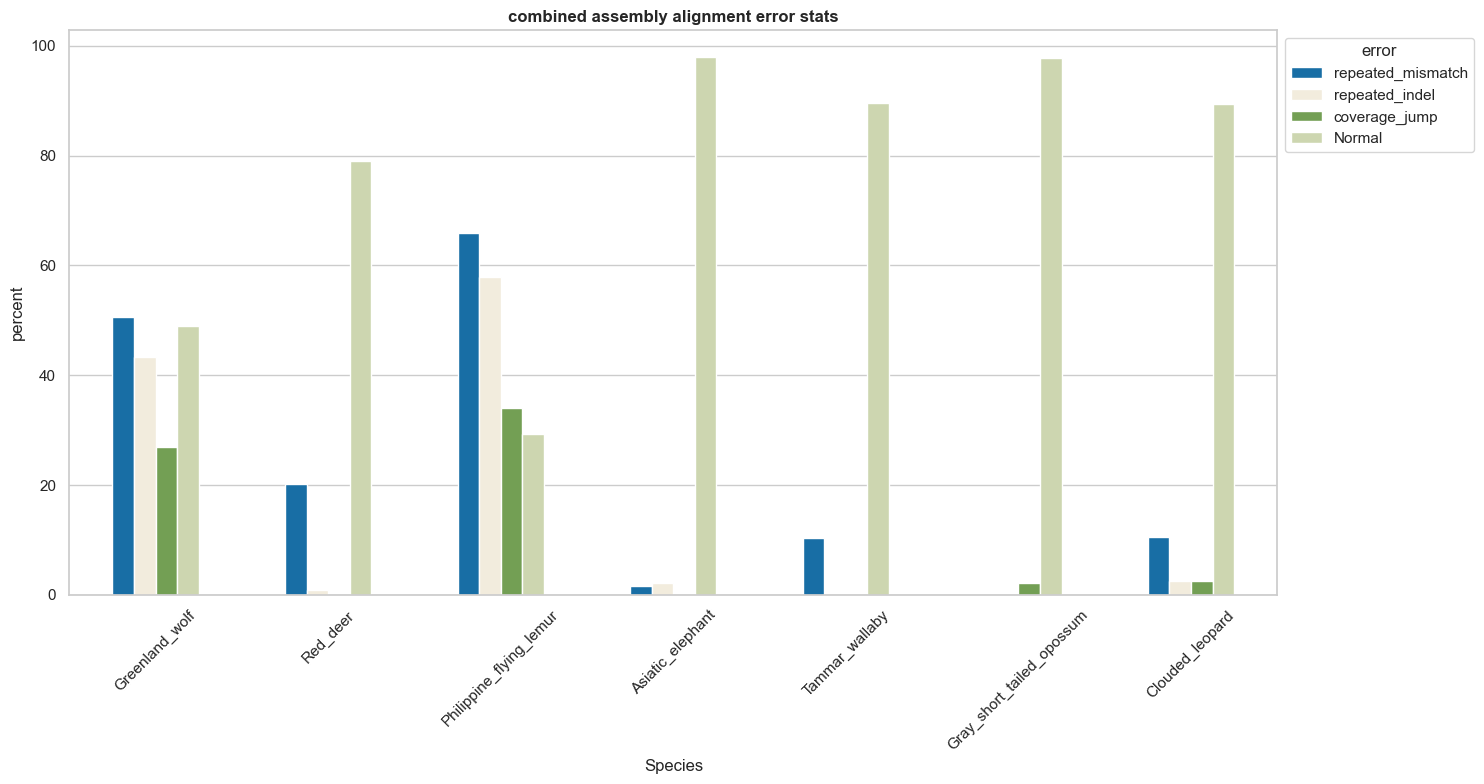

In [15]:
sns.set_theme(style="whitegrid")

ax = sns.barplot(data=combined_summary.melt(id_vars='Species',
                                  value_name='percent', var_name='error'),
            x='Species', y='percent', hue='error', palette=CB_color_cycle, width=0.5)
plt.tight_layout()
plt.xticks(rotation=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('combined assembly alignment error stats', weight='bold')
plt.tight_layout()

plt.savefig("combined.svg", format="svg")

In [16]:
combined_coverage = {}
for name in sheets:
    temp = list(combined[name]['coverage'])
    combined_coverage[name] = temp

combined_unique60_indel = {}
for name in sheets:
    temp = list(combined[name].loc[combined[name]['repeated_indel'] > 0, 'unique60_ratio'])
    combined_unique60_indel[name] = temp

combined_unique60_mismatch = {}
for name in sheets:
    temp = list(combined[name].loc[combined[name]['repeated_mismatch'] > 0, 'unique60_ratio'])
    combined_unique60_mismatch[name] = temp

combined_unique60_normal = {}
for name in sheets:
    temp = list(combined[name].loc[combined[name]['normal'] > 0, 'unique60_ratio'])
    combined_unique60_normal[name] = temp

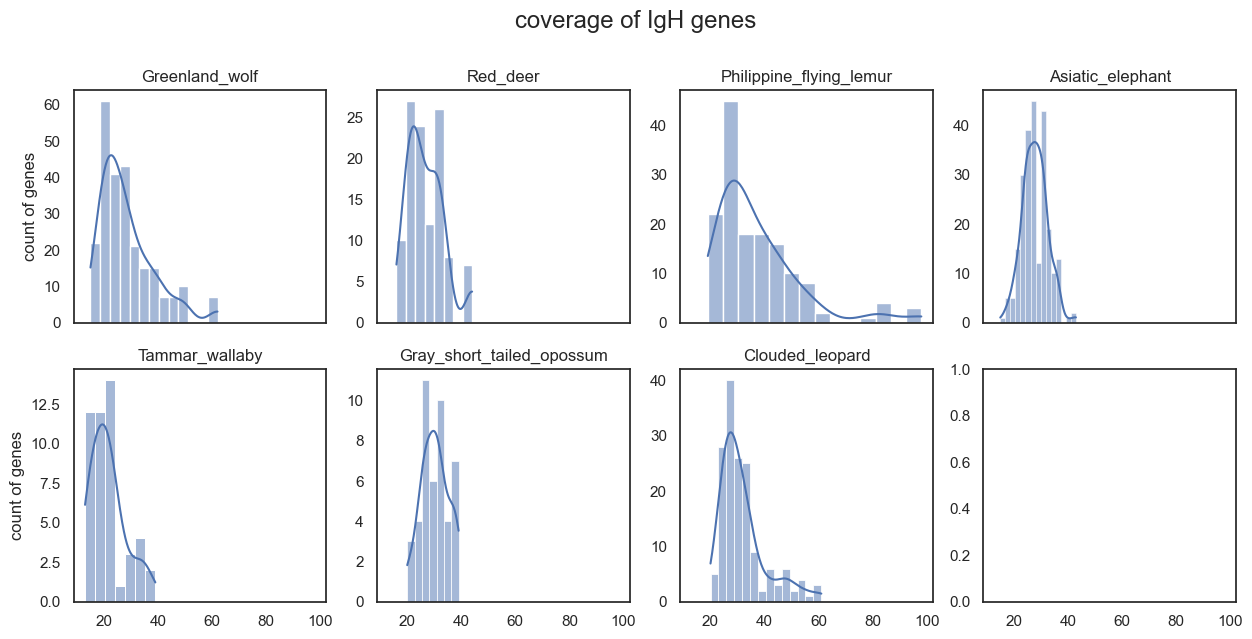

In [17]:
sns.set_theme(style="white")
plt.rcParams['figure.figsize'] = (15,8)

first_key = list(combined_coverage.keys())

fig, ax = plt.subplots(nrows=2, ncols=4, sharex=True)

key=0
for row in ax:
    for col in row:
        if key < 7:
            col.title.set_text(first_key[key])
            sns.histplot(combined_coverage[first_key[key]], ax=col, kde=True)
            key+=1
        if key%4 - 1 == 0:
            col.set_ylabel('count of genes')
        else:
            col.set(ylabel=None)
        
st = fig.suptitle("coverage of IgH genes", fontsize="x-large")
st.set_y(0.85)
fig.subplots_adjust(top=0.75)


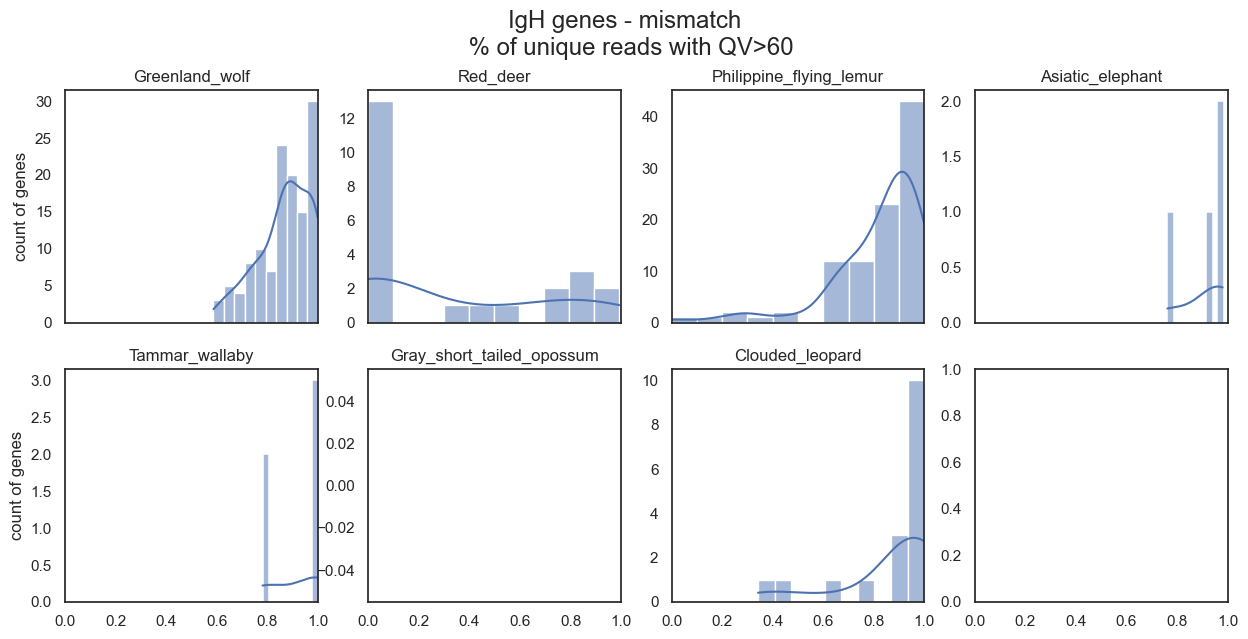

In [18]:
sns.set_theme(style="white")
plt.rcParams['figure.figsize'] = (15,8)

first_key = list(combined_unique60_mismatch.keys())

fig, ax = plt.subplots(nrows=2, ncols=4, sharex=True)

key=0
for row in ax:
    for col in row:
        if key < 7:
            col.title.set_text(first_key[key])
            sns.histplot(combined_unique60_mismatch[first_key[key]], ax=col, kde=True, bins=10)
            key+=1
        if key%4 - 1 == 0:
            col.set_ylabel('count of genes')
        else:
            col.set(ylabel=None)
        col.set_xlim(0,1)
        
st = fig.suptitle("IgH genes - mismatch \n % of unique reads with QV>60", fontsize="x-large")
st.set_y(0.85)
fig.subplots_adjust(top=0.75)


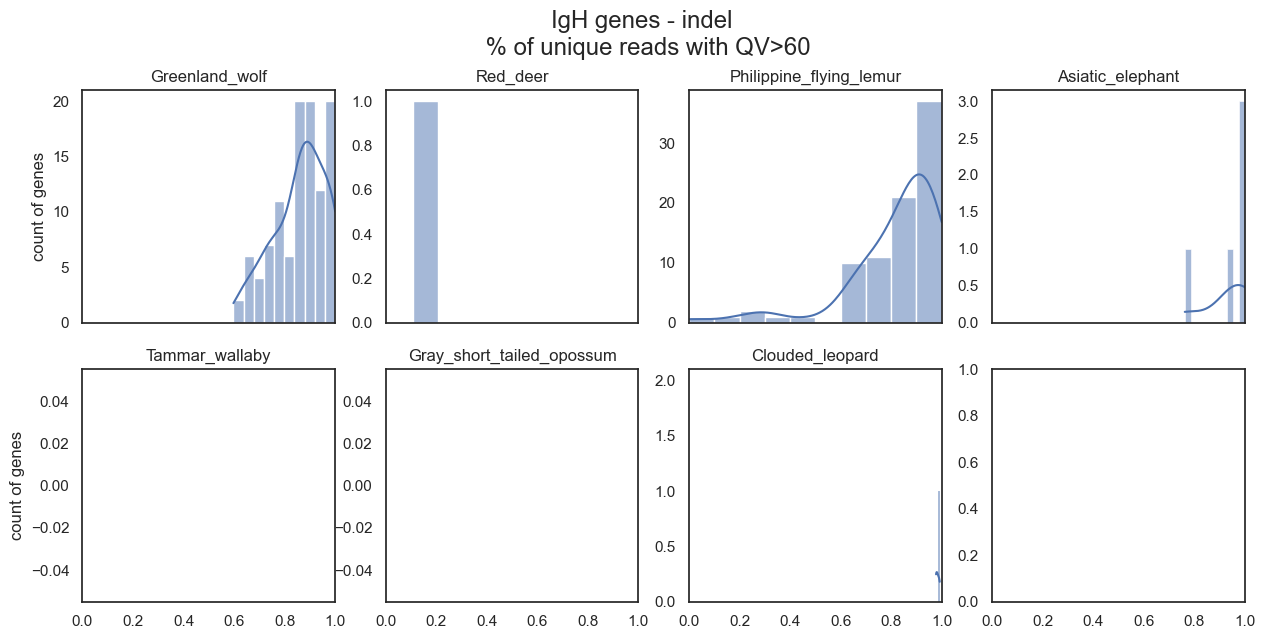

In [19]:
sns.set_theme(style="white")
plt.rcParams['figure.figsize'] = (15,8)

first_key = list(combined_unique60_indel.keys())

fig, ax = plt.subplots(nrows=2, ncols=4, sharex=True)

key=0
for row in ax:
    for col in row:
        if key < 7:
            col.title.set_text(first_key[key])
            sns.histplot(combined_unique60_indel[first_key[key]], ax=col, kde=True, bins=10)
            key+=1
        if key%4 - 1 == 0:
            col.set_ylabel('count of genes')
        else:
            col.set(ylabel=None)
        col.set_xlim(0,1)

        
st = fig.suptitle("IgH genes - indel \n % of unique reads with QV>60", fontsize="x-large")
st.set_y(0.85)
fig.subplots_adjust(top=0.75)


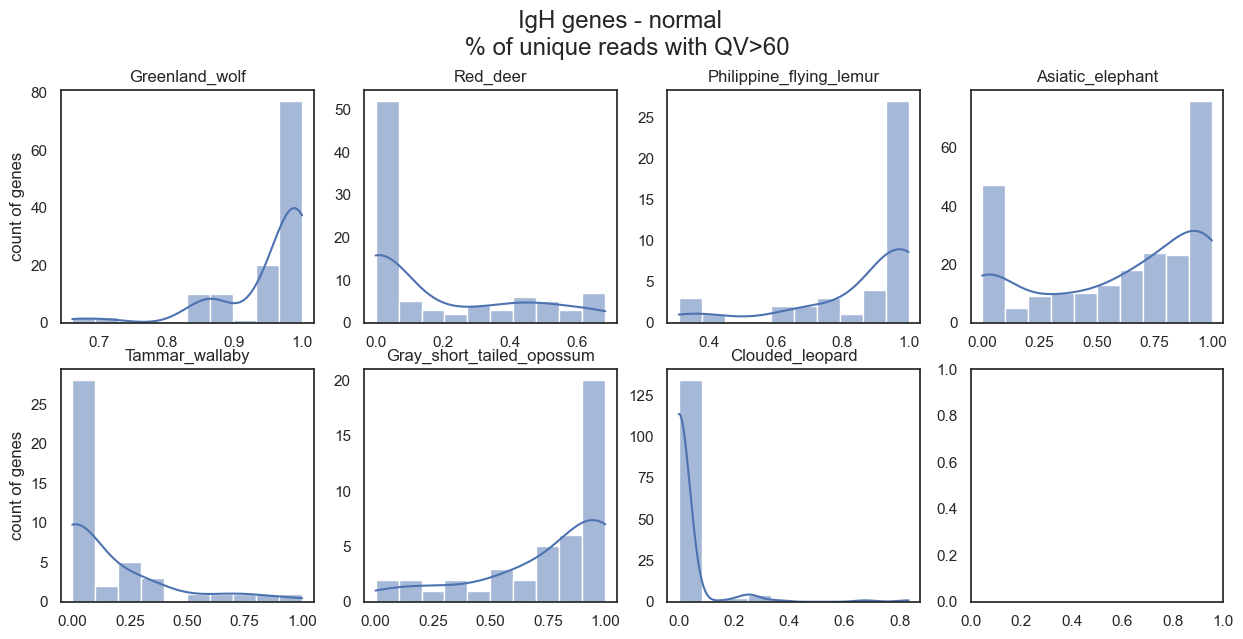

In [20]:
sns.set_theme(style="white")
plt.rcParams['figure.figsize'] = (15,8)

first_key = list(combined_unique60_normal.keys())

fig, ax = plt.subplots(nrows=2, ncols=4)

key=0
for row in ax:
    for col in row:
        if key < 7:
            col.title.set_text(first_key[key])
            sns.histplot(combined_unique60_normal[first_key[key]], ax=col, kde=True, bins=10)
            key+=1
        if key%4 - 1 == 0:
            col.set_ylabel('count of genes')
        else:
            col.set(ylabel=None)
        
st = fig.suptitle("IgH genes - normal \n % of unique reads with QV>60", fontsize="x-large")
st.set_y(0.85)
fig.subplots_adjust(top=0.75)
